In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")

In [17]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
df_train = df.set_index(pd.to_datetime(df["date"], format = "%Y-%m-%d"))

In [19]:
df_train["day"] = df_train.index.day
df_train["month"] = df_train.index.month
df_train["year"] = df_train.index.year

In [20]:
df_train["quarter"] = df_train.index.quarter
df_train["day_of_week"] = df_train.index.dayofweek
df_train["day_of_year"] = df_train.index.dayofyear


In [21]:
df_train.drop("date", inplace = True, axis = 1)

In [22]:
df_train.head()

,meantemp,humidity,wind_speed,meanpressure,day,month,year,quarter,day_of_week,day_of_year
date,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1,2013,1,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,1,2013,1,2,2
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,1,2013,1,3,3
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,1,2013,1,4,4
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,1,2013,1,5,5


# EDA Outlier detection

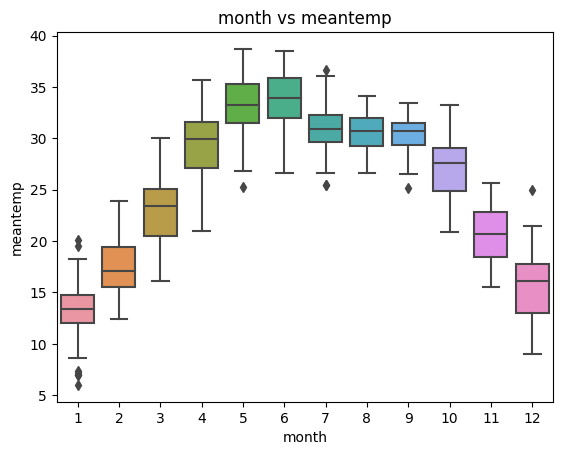

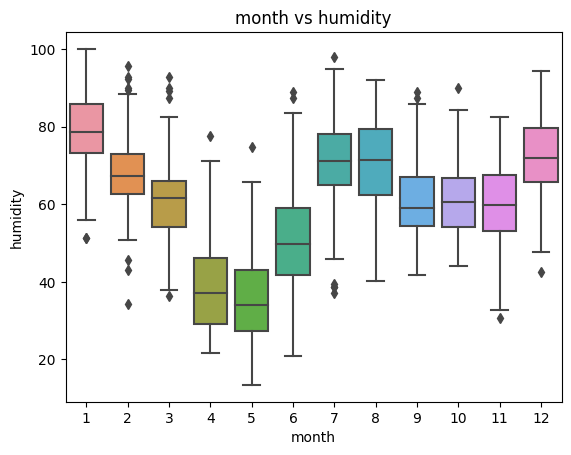

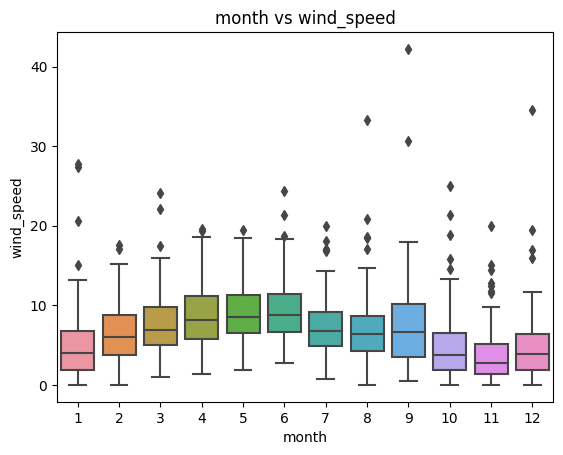

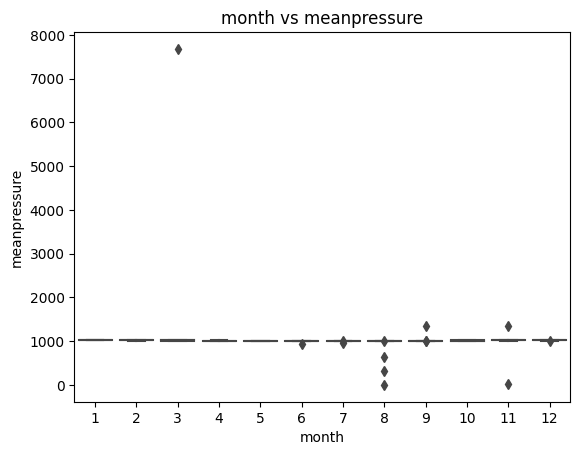

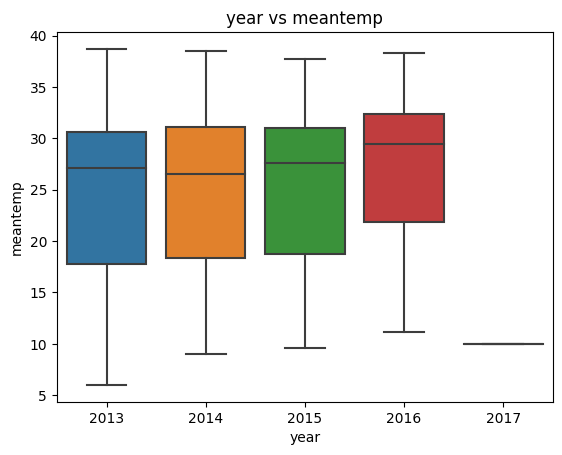

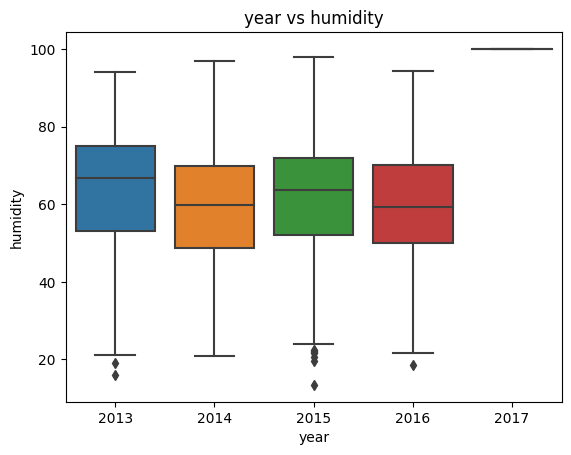

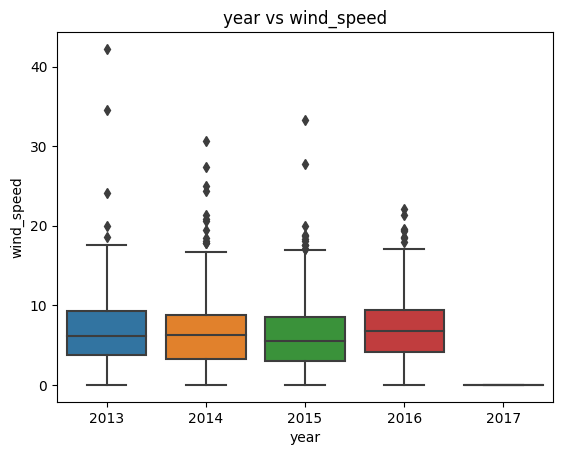

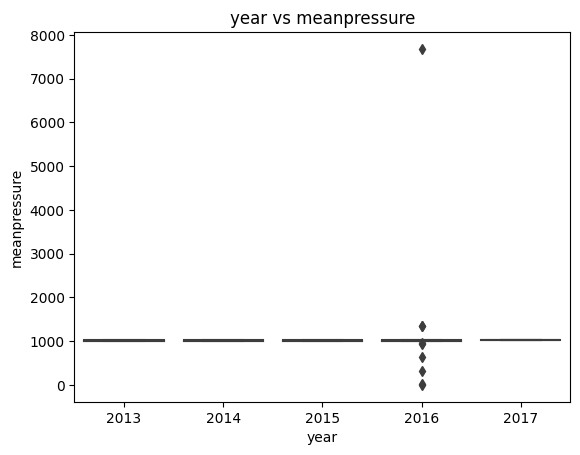

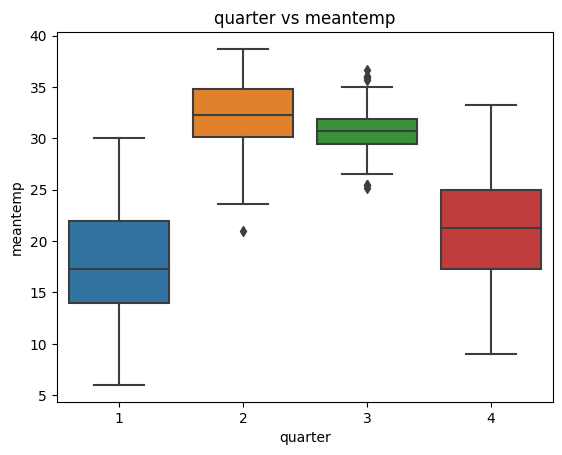

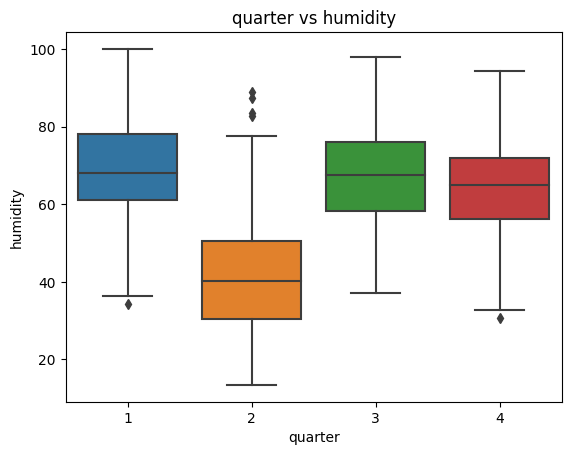

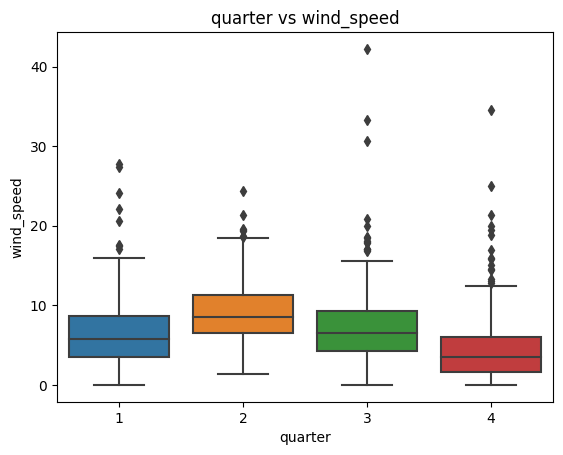

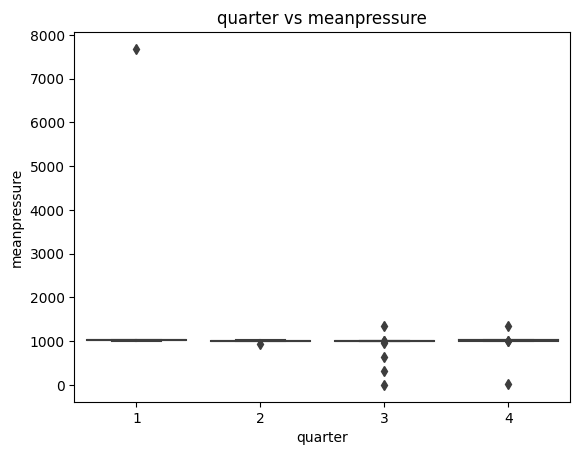

In [23]:
for x_value in df_train.columns[5:-2]:
    for y_value in df_train.columns[:4]:
        sns.boxplot(x = df_train[x_value], y = df_train[y_value])
        plt.title(x_value + " vs " + y_value)
        plt.show()
    

In [24]:
df.shape

(1462, 5)

# Checking for Missing Values

In [25]:
df_train.shape

(1462, 10)

# Time Series Cross Validation

In [26]:
from sklearn.model_selection import TimeSeriesSplit
df_cv = TimeSeriesSplit(n_splits = 5)
for train,test in df_cv.split(df_train):
    print(train[0], train[-1])
    print(test[0], test[-1])

0 246
247 489
0 489
490 732
0 732
733 975
0 975
976 1218
0 1218
1219 1461


# Train and test data size in Time Series Cross Validation technique

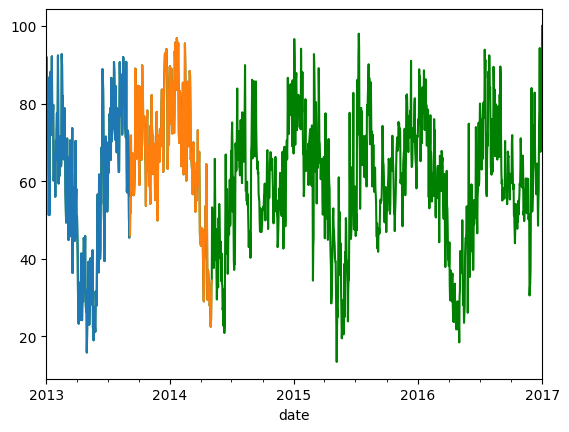

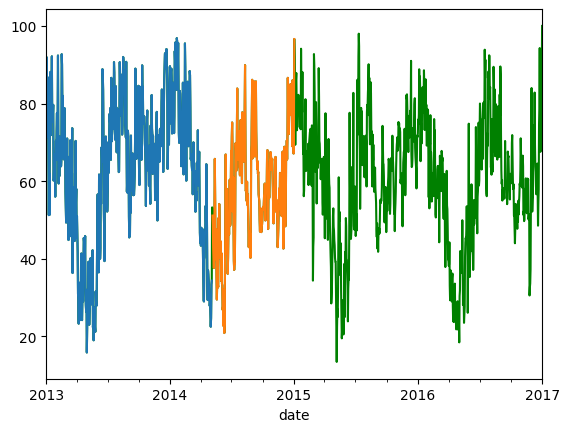

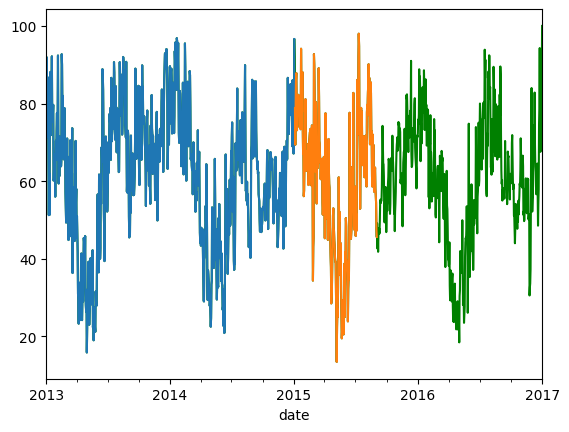

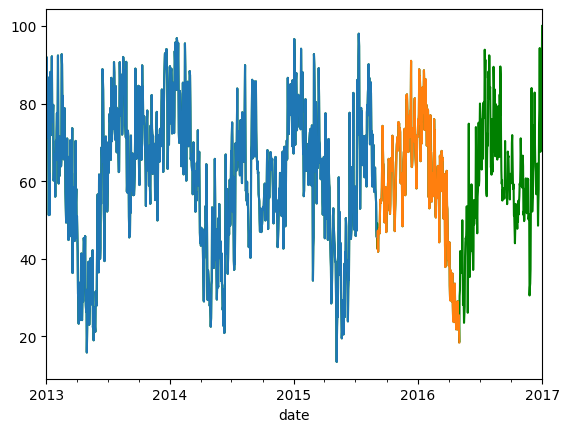

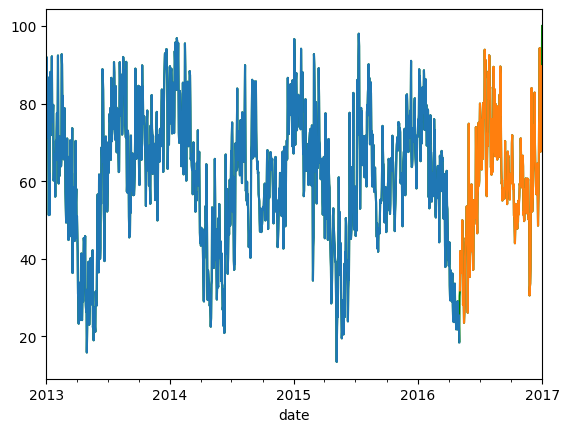

In [30]:
for train,test in df_cv.split(df_train):
    training = df_train[train[0]:train[-1]]
    testing = df_train[test[0]:test[-1]]
    df_train["humidity"].plot(color = "green", label = "complete")
    training["humidity"].plot(label = "train")
    testing["humidity"].plot(label = "test")
    plt.show()

In [31]:
df_train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'day', 'month',
       'year', 'quarter', 'day_of_week', 'day_of_year'],
      dtype='object')

# Linear regression Model

In [39]:
model = LinearRegression()

In [42]:
cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for col in cols:
    i = 0
    for train, test in df_cv.split(df_train):
        X_train = df_train[train[0]:train[-1]].drop(col, axis = 1)
        y_train = df_train[train[0]:train[-1]][col]
        X_test = df_train[test[0]:test[-1]].drop(col, axis = 1)
        y_test = df_train[test[0]:test[-1]][col]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, preds))
        print(f"Model is training on {i+1} dataset")
        print(f"The rmse of {col}: {rmse} ")
        i += 1
    print()

Model is training on 1 dataset
The rmse of meantemp: 6.9401169045743885 
Model is training on 2 dataset
The rmse of meantemp: 2.9783912318087506 
Model is training on 3 dataset
The rmse of meantemp: 2.1448745235370006 
Model is training on 4 dataset
The rmse of meantemp: 302.6715010900131 
Model is training on 5 dataset
The rmse of meantemp: 8.006761588603556 

Model is training on 1 dataset
The rmse of humidity: 41.1049969807842 
Model is training on 2 dataset
The rmse of humidity: 14.59259360545272 
Model is training on 3 dataset
The rmse of humidity: 12.34780650392853 
Model is training on 4 dataset
The rmse of humidity: 809.8326424286122 
Model is training on 5 dataset
The rmse of humidity: 15.344043271879448 

Model is training on 1 dataset
The rmse of wind_speed: 7.339034165444483 
Model is training on 2 dataset
The rmse of wind_speed: 4.198194684551513 
Model is training on 3 dataset
The rmse of wind_speed: 4.57479625081289 
Model is training on 4 dataset
The rmse of wind_speed: